**Created by Gael AHOUANVOEDO**

**🚀 Twitter Database 📊 Udacicty Data Analyst NanoDegree 📈**

**16 June 2022**

# **<center><span style="color:#fd7b12;">🚀 TWITTER DATABASE 🚀   </span></center>**
## <center>For more information you can contact me at +221781203911👍</center>

# **<span style="color:#fd7b12;">Table of Contents  </span>**
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Gathering](#3)
- [4. Assessing](#4)
- [5. Cleaning](#5)
- [6. Storing](#6)
- [7. Data Visualisation](#7)

<a id="1"></a>
# **<center><span style="color:#fd7b12;">Introduction  </span></center>**

### **In this project, I have to manipulate data from the WeRateDogs Twitter account to create interesting and reliable analyzes and visualizations.**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# **<center><span style="color:#fd7b12;">Imports  </span></center>**

In [1]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib.pyplot as plt
import requests
import seaborn as sns

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# **<center><span style="color:#fd7b12;">Gathering </span></center>**

### Read twitter archive enhanced dataframe with pandas

In [2]:
df_enhanced = pd.read_csv("twitter-archive-enhanced.csv")
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Read image predictions file with requetes library

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [4]:
df_predict = pd.read_csv("image_predictions.tsv", sep='\t')
df_predict.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Load Twitter API data with the json file

In [5]:
with open('tweet_json.txt') as f:
    df_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

df_api.columns = ['tweet_id', 'favorites', 'retweets']
df_api.set_index('tweet_id', inplace = True)
df_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


### All dataframes are successfully gather

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# **<center><span style="color:#fd7b12;"> Assessing  </span></center>**

### The goal is to identify for at least eight (8) quality issues and two (2) tidiness issues. We start with our twitter archive  dataset

In [6]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### We observe that we have some missing values. How many in total ?

In [8]:
df_enhanced.isnull().sum().sum() 

11140

### Our timestamp also have wrong data types. Object instead of Date

In [9]:
df_enhanced['timestamp'].dtypes

dtype('O')

### In name also we can oserve that we have wrong dog names like 'a'

In [10]:
df_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### Some notation are badly extract from text we can see it with the index 2355

In [11]:
df_dog = df_enhanced.copy()
df_dog.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [12]:
df_dog.drop(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp','source', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace=True)


In [13]:
df_dog.iloc[2335]

text                  This is an Albanian 3 1/2 legged  Episcopalian...
rating_numerator                                                      1
rating_denominator                                                    2
Name: 2335, dtype: object

In [14]:
df_dog.text[2335] #wrong note extraction

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

### Some dogs have no classification

In [15]:
df_dog = df_enhanced.copy()

In [16]:
df_dog.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp','source', 'text', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 'rating_numerator','rating_denominator', 'name'], axis=1, inplace=True)

In [17]:
df_dog.query('doggo =="None" & floofer=="None" & pupper =="None" & puppo =="None"') #dog with not classification

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


### Another more than one classification

In [18]:
df_dog

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
...,...,...,...,...,...
2351,666049248165822465,None,None,None,None
2352,666044226329800704,None,None,None,None
2353,666033412701032449,None,None,None,None
2354,666029285002620928,None,None,None,None


In [19]:
df_dog.query('doggo =="doggo" & floofer=="floofer" & pupper =="None" & puppo =="None"') #7 dog with more than 1 classification

,tweet_id,doggo,floofer,pupper,puppo
200,854010172552949760,doggo,floofer,None,None


### Source columns contain html codes

In [20]:
df_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### In conclusion, we have :

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Data Quality</u></b><br>

* <i>We observe that we have some missing values</i>
* <i>Timestamp also have wrong data types. Object instead of Date</i>
* <i>In name we can oserve that we have wrong dog names like 'a'</i>
* <i>Some rating are badly extract from text</i>
* <i>Some dogs have no classification</i>
* <i> Some dogs have more than one classification</i>
* <i>Source columns contain html codes</i>
    
    📌 &nbsp;<b><u>Tidness</u></b><br>

* <i>The columns doggo, floofer,pupper and puppo are not easy to analyze and should be in one column</i>
* <i>The dataset should be merge with the twitter archive dataset</i>

### Now we assessing our predict dataset

### Firstly we observe that the dataset should be merge with the twitter archive dataset.

In [21]:
df_predict.head() 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### The dataset has 2075 entries, while twitter archive dataset has 2356 entries.

In [22]:
df_predict.shape[0] 

2075

### Column names are confusing and do not give much information about the content

In [23]:
df_predict.columns 

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### We have duplicates image

In [24]:
df_predict.jpg_url.duplicated().sum()

66

### Non-dog records in the dataset like 'orange'

In [25]:
df_predict.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

### The predictions are sometimes uppercase, sometimes lowercase

In [26]:
df_predict.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Data Quality</u></b><br>

* <i>The dataset has 2075 entries, while twitter archive dataset has 2356 entries</i>
* <i>Column names are confusing and do not give much information about the content</i>
* <i>We have duplicates image</i>
* <i>Non-dog records in the dataset like 'orange'</i>
    
    📌 &nbsp;<b><u>Tidness</u></b><br>

* <i>The dataset should be merge with the twitter archive dataset</i>

### Now we assessing our API dataset

In [27]:
df_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


### Twitter archive dataset has 2356 entries, while twitter API data has 2354.

In [28]:
df_api.shape[0]

2354

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Data Quality</u></b><br>

* <i>Twitter archive dataset has 2356 entries, while twitter API data has 2354.</i>
    
  📌 &nbsp;<b><u>Tidness</u></b><br>

* <i>The dataset should be merge with the twitter archive dataset</i>

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
# **<center><span style="color:#fd7b12;"> Cleaning </span></center>**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>1 - Merge the three Datasets</u></b><br>

* <i>Merge twitter archive enhanced, predict and api datasets on tweet_id </i>
* <i>Make a copy of our new dataset</i>
* <i>Drop unnecessary columns </i>

In [29]:
data = pd.merge(df_enhanced, df_predict, on = "tweet_id", how = "outer")
data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [30]:
data = pd.merge(data, df_api, on = "tweet_id", how = "outer")
data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0


In [31]:
df = data.copy()
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>2 - Drop columns</u></b><br>

* <i>Drop non-assigned </i>
* <i>Drop unnecessary columns</i>

In [32]:
df.shape

(2356, 30)

In [33]:
df = df[df['retweeted_status_id'].isnull()]

In [34]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweets'],
      dtype='object')

In [35]:
df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [36]:
df.shape

(2175, 25)

In [37]:
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   object 
 9   floofer             2175 non-null   object 
 10  pupper              2175 non-null   object 
 11  puppo               2175 non-null   object 
 12  jpg_url             1994 non-null   object 
 13  img_num             1994 non-null   float64
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>3 - One columns for dog classification</u></b><br>

* <i>Read dog types from text column and add it on new columns </i>
* <i>Drop old columns</i>

In [39]:
for index, column in df.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(df.loc[index, 'text']).lower():
            df.loc[index, 'stage'] = word.title()

In [40]:
df.drop(['puppo','pupper','doggo','floofer'],axis=1, inplace=True)
df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,False,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,True,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,True,malamute,0.078253,True,kelpie,0.031379,True,25461.0,4328.0,NaN


In [41]:
df.stage.value_counts()

Pupper     250
Doggo       94
Puppo       31
Floofer     10
Name: stage, dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>4 - Timestamp is object instead of date</u></b><br>

* <i>Covert object into datetime </i>

In [42]:
df.timestamp.dtypes

dtype('O')

In [43]:
df.timestamp = pd.to_datetime(df_enhanced.timestamp)

In [44]:
df.timestamp.dtypes

datetime64[ns, UTC]

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>5 - Wrong dogs name</u></b><br>

* <i>Creating two lists: one for well-extracted names and one for missing names</i>
* <i>Creating a list of texts</i>
* <i>Creating a regex pattern</i>
* <i>Go through the text list and check if the content and pattern matches some of the expressions</i>
* <i>Replace incorrect values with NaN</i>

In [45]:
df.name.value_counts()

None          680
a              55
Lucy           11
Charlie        11
Cooper         10
             ... 
Wishes          1
Rose            1
Theo            1
Fido            1
Christoper      1
Name: name, Length: 956, dtype: int64

In [46]:
extracted_names = []
missing_names = []

In [47]:
text_list = df['text'].values.tolist()

In [48]:
import re
pattern = re.compile('([A-Z].*)')

In [49]:
for text in df['text']:
    
    if text.__contains__('This is') and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        extracted_names.append(text.split(" ")[2].strip('.').strip(','))
    elif text.startswith("Meet") and pattern.fullmatch(text.split(" ")[1]):
        extracted_names.append(text.split(" ")[1].strip('.').strip(','))
    elif text.startswith("Here we have") and pattern.fullmatch(text.split(" ", 3)[3]):
        extracted_names.append(text.split(" ")[3].strip('.').strip(','))
    elif text.split(" ").__contains__("named") and pattern.fullmatch(text.split()[text.split().index("named")+1]):
        extracted_names.append(text.split()[text.split().index("named")+1].strip('.').strip(','))
    elif text.__contains__("name is") and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        extracted_names.append(text.split()[text.split().index("is")+1].strip('.').strip(','))
    elif text.__contains__("Say hello to") and pattern.fullmatch(text.split()[text.split().index("to")+1]):
        extracted_names.append(text.split(" ")[3].strip('.').strip(','))
    else:
        extracted_names.append("NaN")
        missing_names.append(text)

In [50]:
missing_names

["Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 "Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm",
 "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
 'You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV',
 'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp',
 '@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution',
 'Here we have a corgi underc

In [51]:
df['name'] = extracted_names

In [52]:
df['name'] = df['name'].replace(to_replace = r'^([a-z])', value = np.nan, regex = True)

In [53]:
df.name.value_counts()

NaN           755
Charlie        11
Lucy           11
Oliver         10
Cooper         10
             ... 
Emma            1
Spencer         1
Lilli           1
Boston          1
Christoper      1
Name: name, Length: 958, dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>6 - Bad rating</u></b><br>

* <i>Save index of tweets with denominator greater than 10</i>
* <i>Fix rating manually for tweets for which rating was read incorrectly</i>
* <i>Add normalized rating</i>

In [54]:
high_denominator = df[df.rating_denominator > 10].index
high_denominator

Int64Index([ 342,  433,  902, 1068, 1120, 1165, 1202, 1228, 1254, 1274, 1351,
            1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843],
           dtype='int64')

In [55]:
df.loc[832088576586297345, 'rating_denominator'] = 0
df.loc[832088576586297345, 'rating_numerator'] = 0

df.loc[775096608509886464, 'rating_denominator'] = 10
df.loc[775096608509886464, 'rating_numerator'] = 14

df.loc[740373189193256964, 'rating_denominator'] = 10
df.loc[740373189193256964, 'rating_numerator'] = 14

df.loc[722974582966214656, 'rating_denominator'] = 10
df.loc[722974582966214656, 'rating_numerator'] = 13

df.loc[716439118184652801, 'rating_denominator'] = 10
df.loc[716439118184652801, 'rating_numerator'] = 11

df.loc[682962037429899265, 'rating_denominator'] = 10
df.loc[682962037429899265, 'rating_numerator'] = 10

In [56]:
df.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
1634,"Two sneaky puppers were not initially seen, mo...",130.0,143.0
1663,"I'm aware that I could've said 20/16, but here...",16.0,20.0
1843,Here we have an entire platoon of puppers. Tot...,80.0,88.0


In [57]:
df['rating'] = df['rating_numerator'] / df['rating_denominator']

In [58]:
df[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
1018,Guys... Dog Jesus 2.0\n13/10 buoyant af https:...,10.0,13.0,1.3
1214,This is Michelangelope. He's half coffee cup. ...,10.0,12.0,1.2
1435,Please stop sending in saber-toothed tigers. T...,10.0,8.0,0.8
214,This is Iggy. He was a rescue dog killed in th...,10.0,14.0,1.4
2097,This is Jerry. He's a great listener. Low main...,10.0,8.0,0.8


<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>7 - Remove html from source</u></b><br>

* <i>Extract source in value</i>

In [59]:
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,stage,rating
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,bagel,0.085851,False,banana,0.076110,False,39467.0,8853.0,NaN,1.3
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,Pekinese,0.090647,True,papillon,0.068957,True,33819.0,6514.0,NaN,1.3


In [60]:
df.source = df.source.str.extract("\>(.*?)\<", expand = True)

In [61]:
df.iloc[:,:3].head(2)

,tweet_id,timestamp,source
0,8.924206e+17,2017-08-01 16:23:56+00:00,Twitter for iPhone
1,8.921774e+17,2017-08-01 00:17:27+00:00,Twitter for iPhone


In [62]:
df.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>8 - Duplicates image</u></b><br>

* <i>DisplAy jpg_url duplicates</i>
* <i>Delete duplicated jpg_url</i>
* <i>DisplAy jpg_url duplicates</i>
* <i>DisplAy jpg_url duplicates</i>

In [63]:
sum(df.jpg_url.duplicated())

186

In [64]:
df = df.drop_duplicates(subset=['jpg_url'], keep='last')

In [65]:
sum(df['jpg_url'].duplicated())

0

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b><u>9 - Rename Columns</u></b><br>

* <i>Rename predict columns</i>

In [66]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorites', 'retweets', 'stage', 'rating'],
      dtype='object')

In [67]:
df.columns = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls','rating_numerator', 'rating_denominator', 'name','image_url', 'img_number', '1st_prediction','1st_prediction_confidence','1st_prediction_isdog','2nd_prediction','2nd_prediction_confidence','2nd_prediction_isdog','3rd_prediction','3rd_prediction_confidence','3rd_prediction_isdog', 'favorites','retweets','stage', 'rating']

In [68]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'image_url',
       'img_number', '1st_prediction', '1st_prediction_confidence',
       '1st_prediction_isdog', '2nd_prediction', '2nd_prediction_confidence',
       '2nd_prediction_isdog', '3rd_prediction', '3rd_prediction_confidence',
       '3rd_prediction_isdog', 'favorites', 'retweets', 'stage', 'rating'],
      dtype='object')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b><u>9 - Fill/Drop null values</u></b><br>

* <i>Fill some null values</i>
* <i>Drop the others values</i>

In [69]:
df.isnull().sum()

tweet_id                        1
timestamp                       1
source                          1
text                            1
expanded_urls                   1
rating_numerator                0
rating_denominator              0
name                            4
image_url                       1
img_number                      1
1st_prediction                  1
1st_prediction_confidence       1
1st_prediction_isdog            1
2nd_prediction                  1
2nd_prediction_confidence       1
2nd_prediction_isdog            1
3rd_prediction                  1
3rd_prediction_confidence       1
3rd_prediction_isdog            1
favorites                       1
retweets                        1
stage                        1653
rating                          0
dtype: int64

In [70]:
df['stage'].fillna(value = 'Unknown', inplace=True)

In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

tweet_id                     0
timestamp                    0
source                       0
text                         0
expanded_urls                0
rating_numerator             0
rating_denominator           0
name                         0
image_url                    0
img_number                   0
1st_prediction               0
1st_prediction_confidence    0
1st_prediction_isdog         0
2nd_prediction               0
2nd_prediction_confidence    0
2nd_prediction_isdog         0
3rd_prediction               0
3rd_prediction_confidence    0
3rd_prediction_isdog         0
favorites                    0
retweets                     0
stage                        0
rating                       0
dtype: int64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b><u>10 - Re-Order Columns</u></b><br>

* <i>Fill some null values</i>
* <i>Drop the others values</i>

In [73]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'image_url',
       'img_number', '1st_prediction', '1st_prediction_confidence',
       '1st_prediction_isdog', '2nd_prediction', '2nd_prediction_confidence',
       '2nd_prediction_isdog', '3rd_prediction', '3rd_prediction_confidence',
       '3rd_prediction_isdog', 'favorites', 'retweets', 'stage', 'rating'],
      dtype='object')

In [74]:
df.shape[1]

23

In [75]:
df = df[['tweet_id', 'timestamp', 'source', 'text','name', 'stage','rating_numerator', 'rating_denominator', 'rating', 'favorites','retweets','image_url', 'img_number','1st_prediction','1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction','2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction','3rd_prediction_confidence', '3rd_prediction_isdog','expanded_urls']]

In [76]:
df.head(5)

,tweet_id,timestamp,source,text,name,stage,rating_numerator,rating_denominator,rating,favorites,...,1st_prediction,1st_prediction_confidence,1st_prediction_isdog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_isdog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_isdog,expanded_urls
0,8.924206e+17,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,Unknown,13.0,10.0,1.3,39467.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://twitter.com/dog_rates/status/892420643...
1,8.921774e+17,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,Unknown,13.0,10.0,1.3,33819.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421...
2,8.918152e+17,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,Unknown,12.0,10.0,1.2,25461.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181...
3,8.916896e+17,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,Unknown,13.0,10.0,1.3,42908.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,https://twitter.com/dog_rates/status/891689557...
4,8.913276e+17,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,Unknown,12.0,10.0,1.2,41048.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,https://twitter.com/dog_rates/status/891327558...


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
# **<center><span style="color:#fd7b12;"> Storing </span></center>**

In [77]:
df.to_csv('twitter.csv', index = False)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="7"></a>
# **<center><span style="color:#fd7b12;"> Data Visualisation </span></center>**

In [78]:
df.head()

,tweet_id,timestamp,source,text,name,stage,rating_numerator,rating_denominator,rating,favorites,...,1st_prediction,1st_prediction_confidence,1st_prediction_isdog,2nd_prediction,2nd_prediction_confidence,2nd_prediction_isdog,3rd_prediction,3rd_prediction_confidence,3rd_prediction_isdog,expanded_urls
0,8.924206e+17,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,Unknown,13.0,10.0,1.3,39467.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,https://twitter.com/dog_rates/status/892420643...
1,8.921774e+17,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,Tilly,Unknown,13.0,10.0,1.3,33819.0,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421...
2,8.918152e+17,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,Unknown,12.0,10.0,1.2,25461.0,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181...
3,8.916896e+17,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,Darla,Unknown,13.0,10.0,1.3,42908.0,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,https://twitter.com/dog_rates/status/891689557...
4,8.913276e+17,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,Franklin,Unknown,12.0,10.0,1.2,41048.0,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,https://twitter.com/dog_rates/status/891327558...


In [79]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'name', 'stage',
       'rating_numerator', 'rating_denominator', 'rating', 'favorites',
       'retweets', 'image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog', 'expanded_urls'],
      dtype='object')

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b>1 - Count of dogs name in the dataset </b><br>

Text(0.5, 1.0, 'Count of dogs name in the dataset')

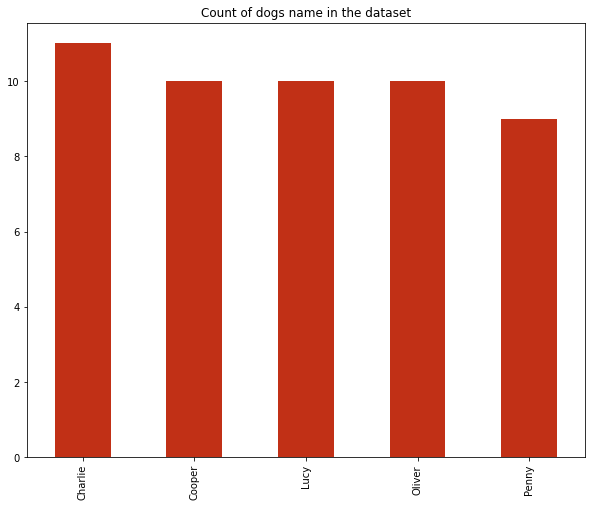

In [80]:
best_name = df.copy()
best_name.drop(best_name[(best_name['name'] == 'NaN')].index, inplace=True)
plt.figure(figsize=(10,8))
best_name.name.value_counts().head(5).plot(kind='bar', color = "#C13016")
plt.title('Count of dogs name in the dataset', )

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b>2 - Count of dogs stage in the dataset </b><br>

Text(0.5, 1.0, 'Count of dogs stage in the dataset')

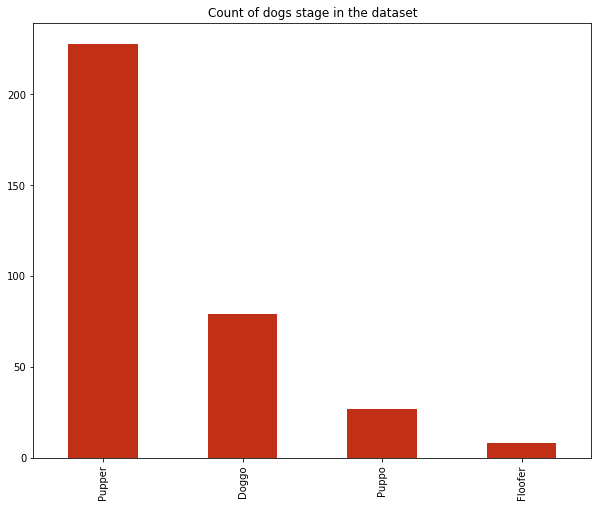

In [81]:
best_stage = df.copy()
best_stage.drop(best_stage[(best_stage['stage'] == 'Unknown')].index, inplace=True)
plt.figure(figsize=(10,8))
best_stage.stage.value_counts().plot(kind='bar' ,  color = "#C13016")
plt.title('Count of dogs stage in the dataset', )

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b>3 - Distribution of dogs cuteness </b><br>

In [82]:
df_cuteness = df[df['rating'] > 0]

In [83]:
df.rating.describe()

count    1991.000000
mean        1.169303
std         4.070134
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

In [84]:
cute_label = ['Good Dog (0, 1.875]', 'Beautiful Dog (1.875, 3.75]', 'Adorable Dog (3.75, 5.625]', 'Magnific Dog (5.625, 7.5]']

In [85]:
cute_bins = pd.qcut(df_cuteness['rating'], 4, labels = cute_label)

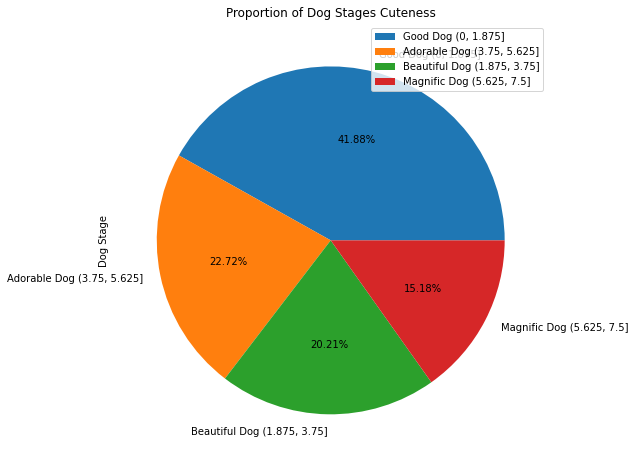

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
cute_bins.value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.2f%%')
plt.title('Proportion of Dog Stages Cuteness')
plt.legend();

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b>4 - Most beautiful dogs</b><br>

In [87]:
best_dog = df.groupby('name')

In [88]:
best_dog.rating.mean().sort_values(ascending=False).head(5)

name
Atticus     89.350000
Logan        7.500000
Sam          2.214286
Sophie       1.500000
Clifford     1.400000
Name: rating, dtype: float64

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
        📌 &nbsp;<b>5 - Most beautiful stage</b><br>

In [89]:
best_stage = df.groupby('stage')

In [90]:
best_stage.rating.mean().sort_values(ascending=False).head(4)

stage
Puppo      1.211111
Floofer    1.187500
Unknown    1.181433
Doggo      1.174684
Name: rating, dtype: float64

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>